## <a> Motivação </a>

Na carreira de cientista de dados, muitos desafios reais são abordados por meio de problemas de classificação. Nesse contexto, nossa variável dependente é discreta, o que resulta em diferentes classes. Essas classes podem ser apenas duas, configurando um problema de classificação binária, ou podem ser várias, caracterizando um problema multiclasse.

No processo de desenvolvimento do modelo, a etapa de criação, treinamento, validação e teste pode ser considerada a mais "fácil". No entanto, para elevar o nível, é crucial concentrar esforços em outras áreas igualmente importantes.

A abordagem mais desafiadora envolve tomar decisões sobre como lidar com dados faltantes (missing data) de maneira eficiente. Além disso, a engenharia de recursos (feature engineering) desempenha um papel fundamental na preparação dos dados, buscando transformações e representações que possam melhorar o desempenho do modelo.

A seleção apropriada de métricas também é crucial, pois elas permitem avaliar a qualidade do modelo em relação aos objetivos específicos de cada projeto. Essa escolha requer uma certa "criatividade" por parte do cientista de dados, pois diferentes projetos podem demandar métricas distintas.

Em resumo, ser um cientista de dados bem-sucedido vai além de simplesmente criar, treinar, validar e testar modelos. Requer habilidades analíticas e criativas para lidar com dados faltantes, realizar engenharia de recursos eficiente e selecionar métricas adequadas para cada situação. Esses aspectos desafiadores são o que tornam a carreira de cientista de dados emocionante e gratificante.

## <a> Objeto de Estudo </a>

Este projeto aborda o desafio recorrente enfrentado por muitas empresas de como reter seus clientes. Identificar com antecedência se um cliente tem probabilidade de cancelar os serviços é uma vantagem competitiva significativa para qualquer empresa. As estratégias de marketing, gerenciamento de relacionamento com o cliente (CRM) e as equipes de vendas podem se beneficiar imensamente ao possuir informações sobre quais clientes têm maior probabilidade de deixar de utilizar os serviços oferecidos.

Esse tipo de problema é denominado previsão de churn (taxa de evasão), que consiste em prever a porcentagem de clientes que deixam a empresa em um determinado período de tempo. Para resolver esse desafio, é essencial contar com uma base histórica contendo informações sobre clientes que saíram e aqueles que permaneceram na empresa, bem como suas características distintas.

Diversos setores, como bancos, empresas de telecomunicações, varejo e qualquer outra empresa que ofereça serviços e possua dados de seus clientes, podem se beneficiar da construção de modelos preditivos semelhantes aos que serão desenvolvidos neste projeto.

Nossa tarefa consiste em auxiliar uma empresa de telecomunicações a manter seus clientes. Isso será alcançado por meio da criação de modelos capazes de classificar os clientes em duas categorias: "churn" (aqueles com alta probabilidade de cancelar os serviços) ou "não churn" (aqueles que provavelmente permanecerão como clientes). Esses modelos preditivos permitirão que a empresa tome medidas proativas para reter os clientes em risco de evasão, melhorando assim sua taxa de retenção e, consequentemente, sua competitividade no mercado.

A base utilizada pode ser obtida no [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) 

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
df_clientes = pd.read_csv('/Users/vitor************/CURSO **** JUPYTER/script-2/data/train.csv')
df_clientes.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [6]:
df_clientes.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Cada linha é um cliente, portanto, vamos verificar se isso é fato?

In [7]:
df_clientes['id'].is_unique

True

## Entendendo as Colunas:

- **id:** A identidade secreta do cliente, seu número de agente especial.
- **gender:** O gênero do cliente, revelando se é um(a) espião(ã) do sexo masculino ou feminino.
- **SeniorCitizen:** Um indicador sutil se o cliente é um(a) espião(ã) idoso(a).
- **Partner:** Um código cifrado para informar se o cliente tem um parceiro(a) no mundo da espionagem.
- **Dependents:** Um indicador altamente confidencial para revelar se o cliente possui dependentes em sua missão.
- **tenure:** Quantos meses o cliente está envolvido em operações secretas nesta empresa.
- **PhoneService:** Uma informação codificada para saber se o cliente tem acesso aos dispositivos de comunicação.
- **MultipleLines:** Um indicador oculto se o cliente utiliza várias linhas telefônicas em suas comunicações secretas.
- **InternetService:** Uma revelação importante sobre o acesso do cliente ao mundo da internet espiã.
- **OnlineSecurity:** Uma pista cifrada para informar se o cliente possui serviços de segurança online durante suas missões arriscadas.
- **OnlineBackup:** Um recurso essencial para garantir o backup seguro dos dados importantes do cliente.
- **DeviceProtection:** Uma camuflagem adicional para proteger os equipamentos do cliente durante as missões.
- **TechSupport:** O time de suporte técnico que estará disponível para auxiliar em emergências.
- **StreamingTV:** Um canal sigiloso que oferece serviços de streaming de TV para o cliente.
- **StreamingMovies:** Acesso restrito a serviços de streaming de filmes para momentos de lazer após as missões.
- **Contract:** O tipo de contrato que estabelece os termos e a duração do envolvimento do cliente com a agência.
- **PaperlessBilling:** Um código secreto para indicar se as faturas são entregues por métodos eletrônicos ou via agentes secretos.
- **PaymentMethod:** Um detalhe oculto sobre o tipo de pagamento preferido do cliente para suas operações confidenciais.
- **MonthlyCharges:** O valor mensal dos serviços, necessário para financiar as operações secretas.
- **TotalCharges:** O montante total dos serviços desde o início da missão do cliente nesta agência.
- **Churn:** Um indicador altamente confidencial para saber se o cliente "desapareceu" da empresa ou continua com a agência em suas perigosas missões.


In [8]:
df_clientes.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [9]:
#transformando id em indice do dataframe
df_clientes = df_clientes.set_index('id')
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [7]:
df_clientes.shape

(5634, 20)

In [8]:
df_clientes.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [9]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5416 non-null   object 
 4   tenure            5173 non-null   float64
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5535 non-null   object

TotalCharges está como object, mas deveria ser float, vamos fazer a conversão

In [11]:
df_clientes['TotalCharges'].dtype

dtype('O')

In [13]:
# tirando todos os espaços primeiro. Usando expressão regular simples \s 
df_clientes['TotalCharges'] = df_clientes['TotalCharges'].replace("\s+", "", regex=True)

In [16]:
df_clientes.loc[df_clientes['TotalCharges'] == '']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
6755,Male,0,No,Yes,0.00,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0
5219,Male,0,Yes,Yes,0.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6671,Female,0,Yes,Yes,0.00,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0
937,Female,0,Yes,Yes,0.00,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
3827,Male,0,Yes,Yes,0.00,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
1083,Male,0,Yes,Yes,0.00,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
3332,Male,0,Yes,Yes,0.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
1341,Female,0,Yes,Yes,0.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0


In [18]:
# Pegando os índices das linhas que tem nulos pra saber como o to_numeric converte
indices_total_charges_nulo = df_clientes.loc[df_clientes['TotalCharges'] == ''].index
indices_total_charges_nulo

Int64Index([6755, 5219, 6671, 937, 3827, 1083, 3332, 1341], dtype='int64', name='id')

In [19]:
# Filtrando pelos índices pra ver como o to_numeric realiza a coerção de erros
pd.to_numeric(df_clientes['TotalCharges'], errors='coerce')[indices_total_charges_nulo]

id
6755   NaN
5219   NaN
6671   NaN
937    NaN
3827   NaN
1083   NaN
3332   NaN
1341   NaN
Name: TotalCharges, dtype: float64

In [20]:
df_clientes['TotalCharges'] = pd.to_numeric(df_clientes['TotalCharges'], errors='coerce')

In [21]:
df_clientes.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

## <a> Estatística Descritiva </a>

Iniciar com a estatística descritiva é uma abordagem importante para compreender melhor os dados em análise. Vamos investigar as distribuições de tenure (quantos meses o cliente está na empresa), da cobrança mensal (MonthlyCharges) e da cobrança total (TotalCharges), além de verificar se a base de dados está desbalanceada.

In [22]:
df_clientes.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
25%,0.00,9.00,35.46,401.59,0.00
50%,0.00,29.00,70.25,1396.12,0.00
75%,0.00,55.00,89.80,3764.29,1.00
max,1.00,72.00,118.75,8684.80,1.00


SeniorCitizen e Churn são discretas, mas por serem float acabou entrando na dança: vamos ignorar.

Podemos perceber que tenure tem máximo de 72 meses (6 anos). Podemos inferir que os dados foram coletados com essa janela.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

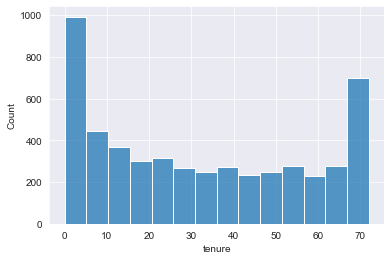

In [23]:
# (meses na empresa)
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_clientes, x='tenure' )

In [11]:
# muitos valores próximos a zero

len(df_clientes.loc[df_clientes['tenure'] <= 4])

893

In [31]:
100 * len(df_clientes.loc[df_clientes['tenure'] <= 5]) / df_clientes.shape[0]

17.607383741569045

In [26]:
# Mudando o padrão de quartis para decis. 
df_clientes.describe(percentiles=np.linspace(0, 1, 11))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
0%,0.00,0.00,18.25,18.80,0.00
10%,0.00,2.00,20.05,85.50,0.00
20%,0.00,6.00,25.10,267.00,0.00
30%,0.00,12.00,45.80,550.98,0.00
40%,0.00,20.00,58.60,939.80,0.00
50%,0.00,29.00,70.25,1396.12,0.00


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

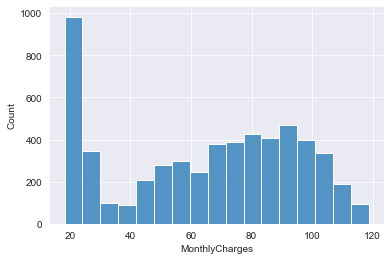

In [32]:
# Analisando a distribuição da cobrança mensal
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_clientes, x='MonthlyCharges')

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

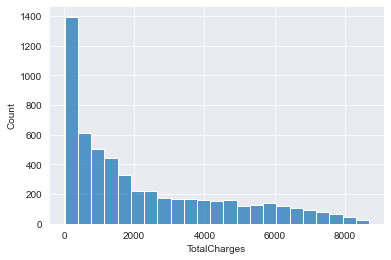

In [33]:
# Analisando a distribuição da cobrança total
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_clientes, x='TotalCharges')


<AxesSubplot:xlabel='Churn', ylabel='count'>

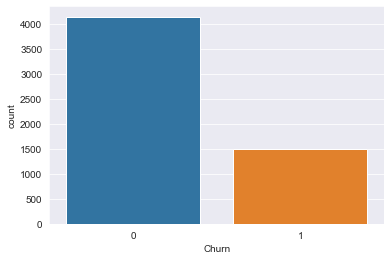

In [34]:
# Analisando a variável target: churn (cancelou os serviços da empresa ou não)
sns.countplot(data=df_clientes, x='Churn')

Temos uma base bastante desbalanceada. Temos que tomar cuidado com a métrica a ser utilizada. Vamos avaliar o desbalanceamento.

In [35]:
len(df_clientes.loc[df_clientes['Churn'] == 0]), len(df_clientes.loc[df_clientes['Churn'] == 1])

(4139, 1495)

Analisar a relação entre as variáveis preditoras (features) e a variável alvo (target) é fundamental para entender como cada feature pode estar relacionada à variável churn (se o cliente saiu da empresa ou não). Vamos utilizar gráficos de dispersão para visualizar essa relação.

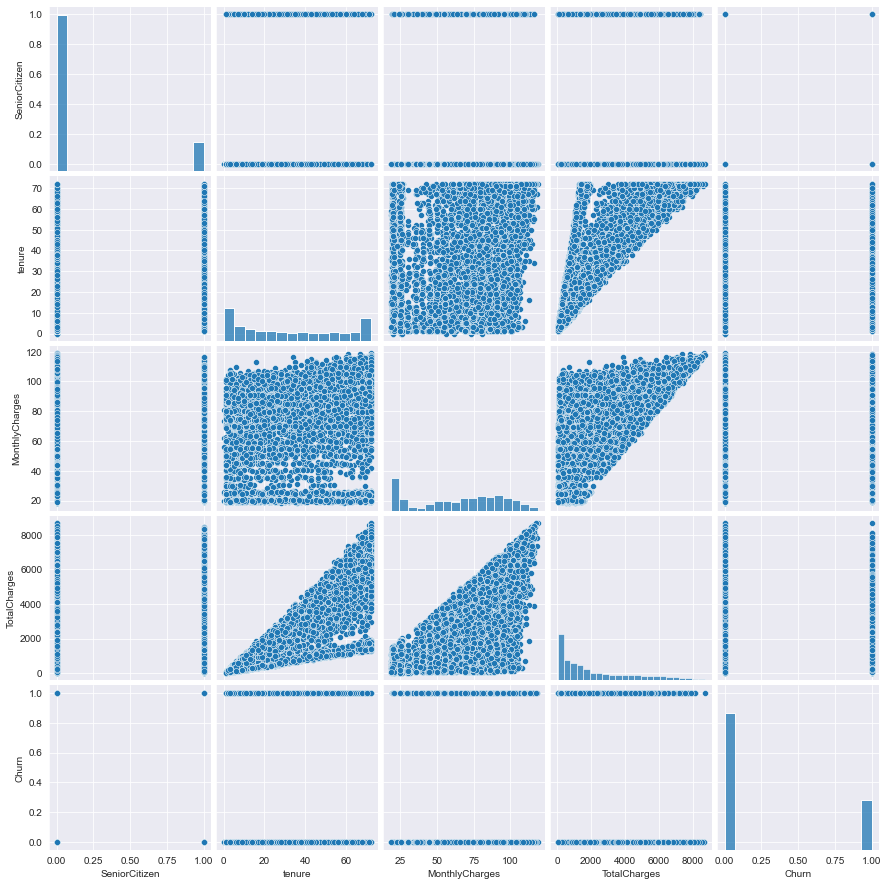

In [37]:
sns.pairplot(data=df_clientes)

Fica evidente uma correlação positiva entre tenure e cobranças totais (o que é bem óbvio). Além disso, nada que chame muito a atenção com relação à variável target. Como ela é categórica, se tivéssemos um gráfico que nem o abaixo, poderíamos inferir uma correlação forte:

![Gráfico com Correlação](img/grafico1.png)

## <a> Codificação de Variáveis Categóricas </a>



In [38]:
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.10,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0
6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1


Vamos analisar quantas classes possuem as variáveis categóricas para saber como codificar cada uma

In [40]:
df_clientes._get_numeric_data().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [41]:
# Exemplo de list comprehension
[coluna for coluna in df_clientes.columns]

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [42]:
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data().columns]
colunas_categoricas

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [43]:
for coluna_categorica in colunas_categoricas:
    display(df_clientes[coluna_categorica].value_counts())

Male      2849
Female    2785
Name: gender, dtype: int64

No     2902
Yes    2732
Name: Partner, dtype: int64

No     3793
Yes    1623
Name: Dependents, dtype: int64

Yes    5082
No      552
Name: PhoneService, dtype: int64

No                  2692
Yes                 2390
No phone service     552
Name: MultipleLines, dtype: int64

Fiber optic    2451
DSL            1959
No             1224
Name: InternetService, dtype: int64

No                     2763
Yes                    1647
No internet service    1224
Name: OnlineSecurity, dtype: int64

No                     2488
Yes                    1922
No internet service    1224
Name: OnlineBackup, dtype: int64

No                     2480
Yes                    1930
No internet service    1224
Name: DeviceProtection, dtype: int64

No                     2793
Yes                    1617
No internet service    1224
Name: TechSupport, dtype: int64

No                     2240
Yes                    2170
No internet service    1224
Name: StreamingTV, dtype: int64

No                     2218
Yes                    2192
No internet service    1224
Name: StreamingMovies, dtype: int64

Month-to-month    3084
Two year          1358
One year          1192
Name: Contract, dtype: int64

Yes    3312
No     2322
Name: PaperlessBilling, dtype: int64

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: PaymentMethod, dtype: int64

As variáveis gender, partner, dependents, phone service e paperless billing, possuem duas classes (sim ou não). Podemos então mapeá-las diretamente:

In [44]:
# Mapear gender, partner, dependents, phone service e paperless billing
df_clientes['gender'] = df_clientes['gender'].map({'Female': 1, 'Male': 0})

colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for coluna_binaria in colunas_binarias:
    df_clientes[coluna_binaria] = df_clientes[coluna_binaria].map({'Yes': 1, 'No': 0})

    

In [45]:
# Será que funcionou?

display(df_clientes['gender'].value_counts())

for colunas_binaria in colunas_binarias:
    display(df_clientes[colunas_binaria].value_counts())

0    2849
1    2785
Name: gender, dtype: int64

0    2902
1    2732
Name: Partner, dtype: int64

0.00    3793
1.00    1623
Name: Dependents, dtype: int64

1    5082
0     552
Name: PhoneService, dtype: int64

1    3312
0    2322
Name: PaperlessBilling, dtype: int64

Por que Dependents ficou diferente?

In [46]:
df_clientes.loc[:, colunas_binarias + ['gender']].isnull().sum()

Partner               0
Dependents          218
PhoneService          0
PaperlessBilling      0
gender                0
dtype: int64

Para as outras variáveis podemos avaliar quais podem ser ordinais para utilizar a codificação ordinal.

In [47]:
# Atualizando as colunas que ainda são categóricas
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data()]
colunas_categoricas

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [48]:
for coluna_categorica in colunas_categoricas:
    display(df_clientes[coluna_categorica].value_counts())

No                  2692
Yes                 2390
No phone service     552
Name: MultipleLines, dtype: int64

Fiber optic    2451
DSL            1959
No             1224
Name: InternetService, dtype: int64

No                     2763
Yes                    1647
No internet service    1224
Name: OnlineSecurity, dtype: int64

No                     2488
Yes                    1922
No internet service    1224
Name: OnlineBackup, dtype: int64

No                     2480
Yes                    1930
No internet service    1224
Name: DeviceProtection, dtype: int64

No                     2793
Yes                    1617
No internet service    1224
Name: TechSupport, dtype: int64

No                     2240
Yes                    2170
No internet service    1224
Name: StreamingTV, dtype: int64

No                     2218
Yes                    2192
No internet service    1224
Name: StreamingMovies, dtype: int64

Month-to-month    3084
Two year          1358
One year          1192
Name: Contract, dtype: int64

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: PaymentMethod, dtype: int64

Podemos inferir que Contract é ordinal, pois possui claramente uma diferença entre os tipos de contrato mensais, anuais e bianuais. Outras que podemos (forçando um pouquinho a barra) são InternetService e PaymentMethod. A 1a porque tendo em vista que fibra ótica normalmente é mais rápida que ADSL (e provavelmente mais cara também). A 2a porque podemos avaliar a facilidade de cobrança pelo correio ser mais difícil/lenta que as mais automáticas e eletrônicas

In [49]:
df_clientes['Contract'] = df_clientes['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df_clientes['InternetService'] = df_clientes['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df_clientes['PaymentMethod'] = df_clientes['PaymentMethod'].map({'Mailed check': 0, 
                                                                 'Electronic check': 1, 
                                                                 'Bank transfer (automatic)': 2,
                                                                 'Credit card (automatic)': 3})
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,No phone service,1,Yes,Yes,Yes,Yes,No,No,2,0,NaN,45.05,2560.10,0
6731,0,0,1,1.00,NaN,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,0,0.00,19.65,332.65,0
6479,1,0,1,0.00,60.00,1,Yes,2,No,Yes,Yes,Yes,Yes,Yes,2,1,3.00,110.80,6640.70,0
6861,1,0,0,0.00,37.00,1,Yes,2,No,Yes,Yes,No,Yes,Yes,0,1,2.00,101.90,3545.35,1
3266,0,0,1,1.00,29.00,1,No,2,No,No,No,No,No,No,0,1,1.00,70.75,1974.80,1


In [50]:
df_clientes.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents          float64
tenure              float64
PhoneService          int64
MultipleLines        object
InternetService       int64
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract              int64
PaperlessBilling      int64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

Para os outros, vamos de one hot encoding

In [51]:
# Atualizando as colunas que ainda são categóricas
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data()]
colunas_categoricas

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [52]:
# Vamos utilizar OHE para variáveis categóricas nominais
from sklearn.preprocessing import OneHotEncoder

In [53]:
ohe = OneHotEncoder(sparse=False, drop='first')
df_ohe_transformadas = ohe.fit_transform(df_clientes[colunas_categoricas])
ohe.categories_

[array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object)]

In [54]:
ohe.get_feature_names_out()

array(['MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype=object)

Bem melhor assim! Vamos então apensar essas novas colunas no dataframe de clientes e remover as colunas originais

In [56]:
df_ohe_transformadas

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [57]:
# Tranformando o array numpy em colunas.
df_ohe_transformadas = pd.DataFrame(data=df_ohe_transformadas, columns=ohe.get_feature_names_out(), index=df_clientes.index)
df_ohe_transformadas.head()

,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,
4030,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [59]:
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,No phone service,1,Yes,Yes,Yes,Yes,No,No,2,0,NaN,45.05,2560.10,0
6731,0,0,1,1.00,NaN,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,0,0.00,19.65,332.65,0
6479,1,0,1,0.00,60.00,1,Yes,2,No,Yes,Yes,Yes,Yes,Yes,2,1,3.00,110.80,6640.70,0
6861,1,0,0,0.00,37.00,1,Yes,2,No,Yes,Yes,No,Yes,Yes,0,1,2.00,101.90,3545.35,1
3266,0,0,1,1.00,29.00,1,No,2,No,No,No,No,No,No,0,1,1.00,70.75,1974.80,1


In [58]:
df_ohe_transformadas.shape

(5634, 14)

In [60]:
# Utilizando o concat para realizar um "JOIN" entre os dataframes original e as colunas com one hot encoding
df_clientes = pd.concat([df_clientes, df_ohe_transformadas], axis=1)
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,No phone service,1,Yes,Yes,Yes,Yes,No,No,2,0,NaN,45.05,2560.10,0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,0,0.00,19.65,332.65,0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,Yes,2,No,Yes,Yes,Yes,Yes,Yes,2,1,3.00,110.80,6640.70,0,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,Yes,2,No,Yes,Yes,No,Yes,Yes,0,1,2.00,101.90,3545.35,1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,No,2,No,No,No,No,No,No,0,1,1.00,70.75,1974.80,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [61]:
colunas_categoricas

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [62]:
# Removendo colunas originais 
df_clientes = df_clientes.drop(colunas_categoricas, axis=1)
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,1,2,0,NaN,45.05,2560.10,0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,0,1,0,0.00,19.65,332.65,0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,2,2,1,3.00,110.80,6640.70,0,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,2,0,1,2.00,101.90,3545.35,1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,2,0,1,1.00,70.75,1974.80,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [63]:
df_clientes.dtypes

gender                                    int64
SeniorCitizen                             int64
Partner                                   int64
Dependents                              float64
tenure                                  float64
PhoneService                              int64
InternetService                           int64
Contract                                  int64
PaperlessBilling                          int64
PaymentMethod                           float64
MonthlyCharges                          float64
TotalCharges                            float64
Churn                                     int64
MultipleLines_No phone service          float64
MultipleLines_Yes                       float64
OnlineSecurity_No internet service      float64
OnlineSecurity_Yes                      float64
OnlineBackup_No internet service        float64
OnlineBackup_Yes                        float64
DeviceProtection_No internet service    float64
DeviceProtection_Yes                    

## <a> Determinando quem são variáveis preditoras e variável target </a>

Variáveis preditoras: X; variável target: y.

In [64]:
df_clientes.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [65]:
X = df_clientes.drop('Churn', axis=1) # tirando a variável dependente
y = df_clientes[['Churn']] # extraindo a variável dependente

In [66]:
# Variáveis preditoras (ou independentes ou, features)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,1,2,0,NaN,45.05,2560.10,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,0,1,0,0.00,19.65,332.65,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,2,2,1,3.00,110.80,6640.70,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,2,0,1,2.00,101.90,3545.35,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,2,0,1,1.00,70.75,1974.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [67]:
# Variável target
y.head()

,Churn
id,
4030,0
6731,0
6479,0
6861,1
3266,1


## <a> Separação de bases </a>

Isso evita tratamento de missing data (valores faltantes), por exemplo, e tais transformações deve ser realizadas DEPOIS do split (separação).

In [68]:
#  faremos cross validation com a base de treino
from sklearn.model_selection import train_test_split

In [69]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, # preditoras 
                                                        y, # target
                                                        test_size=.2, 
                                                        random_state=42)

# quantas linhas ficamos com treino e teste
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((4507, 26), (1127, 26), (4507, 1), (1127, 1))

In [70]:
X_treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,NaN,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
896,0,0,0,0.00,30.00,1,2,0,1,NaN,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
6991,0,0,1,0.00,36.00,1,2,0,1,1.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
5455,1,1,1,0.00,1.00,1,2,0,1,1.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [71]:
y_treino.head()

,Churn
id,
3559,0
896,0
3600,0
6991,0
5455,1


In [72]:
X_treino.shape[0] / X.shape[0]

0.7999645012424565

## <a> Tratamento de dados faltantes (missing data) </a>

In [73]:
# isnull busca quem é nulo (dados faltantes)
X_treino.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                              171
tenure                                  366
PhoneService                              0
InternetService                           0
Contract                                  0
PaperlessBilling                          0
PaymentMethod                            78
MonthlyCharges                            0
TotalCharges                              6
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service 

In [74]:
X_teste.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                              47
tenure                                  95
PhoneService                             0
InternetService                          0
Contract                                 0
PaperlessBilling                         0
PaymentMethod                           21
MonthlyCharges                           0
TotalCharges                             2
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

#### Existem diversas formas de tratar missing data, as formas podem inclusive ser testadas (com cross validation) para avaliar qual é a mais robusta para performance do modelo. Vamos testar algumas durante os treinamentos.

In [75]:
# 1o o mais simples: utilizar as medidas de tendência central!!
# Antes disso vamos guardar os X originais para tentar outras formas mais tarde
X_treino_original = X_treino.copy()
X_teste_original = X_teste.copy()

y_treino_original = y_treino.copy()
y_teste_original = y_teste.copy()

In [76]:
X_treino.loc[:, X_treino.isnull().sum() > 0].columns

Index(['Dependents', 'tenure', 'PaymentMethod', 'TotalCharges'], dtype='object')

In [77]:
X_teste.loc[:, X_teste.isnull().sum() > 0].columns

Index(['Dependents', 'tenure', 'PaymentMethod', 'TotalCharges'], dtype='object')

In [80]:
# Para as variáveis numéricas, vamos utilizar a mediana, para as categóricas, a moda
mediana_tenure = X_treino['tenure'].median()
mediana_dependents = X_treino['Dependents'].median()
mediana_total_charges = X_treino['TotalCharges'].median()
moda_payment_method = X_treino['PaymentMethod'].value_counts().index[0]

mediana_tenure, mediana_dependents, mediana_total_charges, moda_payment_method

(29.0, 0.0, 1389.6, 1.0)

In [83]:
X_treino.loc[X_treino['tenure'].isnull(), 'tenure'] = mediana_tenure
X_treino.loc[X_treino['Dependents'].isnull(), 'Dependents'] = mediana_dependents
X_treino.loc[X_treino['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_treino.loc[X_treino['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment_method

X_treino.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [84]:
# Não podemos calcular medidas de tendência central com a base toda! 
# foi calculado na base de treino
X_teste.loc[X_teste['tenure'].isnull(), 'tenure'] = mediana_tenure 
X_teste.loc[X_teste['Dependents'].isnull(), 'Dependents'] = mediana_dependents 
X_teste.loc[X_teste['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges 
X_teste.loc[X_teste['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment_method 

X_teste.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

## <a> Vamos de Machine Learning? </a>

Primeiro modelo que vamos treinar é a regressão logística! A prima esquisita da regressão linear, que nem pra regressão serve, mas sim pra classificação! Lembrando que vamos utilizar cross validation para evitar overfit e ter uma base de comparação para outros modelos

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [86]:
regressao_logistica = LogisticRegression(max_iter=500)

In [88]:
type(regressao_logistica)

sklearn.linear_model._logistic.LogisticRegression

In [89]:
# Vamos treinar utilizando cross validation
valores_f1_rl = cross_val_score(estimator=regressao_logistica, 
                                  X=X_treino, 
                                  y=y_treino.values.flatten(), 
                                  cv=10, # 10-fold CV
                                  scoring='f1') # f1 score porque a base está desbalanceada
valores_f1_rl

array([0.61946903, 0.61802575, 0.60262009, 0.55111111, 0.6367713 ,
       0.64377682, 0.68122271, 0.58035714, 0.53846154, 0.61261261])

In [90]:
len(valores_f1_rl)

10

In [91]:
media_f1_rl = valores_f1_rl.mean()
f'f1-score: {media_f1_rl*100}'

'f1-score: 60.844281019066294'

In [92]:
# Modelo de bagging
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

# Vamos treinar utilizando cross validation 
valores_f1_rf = cross_val_score(estimator=random_forest, 
                                      X=X_treino, 
                                      y=y_treino.values.flatten(), 
                                      cv=10, # 
                                  scoring='f1')
valores_f1_rf

array([0.61032864, 0.55963303, 0.58119658, 0.47663551, 0.62672811,
       0.63348416, 0.61395349, 0.55924171, 0.54545455, 0.61971831])

In [93]:
media_f1_rf = valores_f1_rf.mean()
f'f1-score: {media_f1_rf*100}'


'f1-score: 58.26374084577798'

### Finalmente, o famoso XGBoost

In [94]:
import xgboost as xgb

In [95]:
xgb_model = xgb.XGBClassifier(random_state=42, 
                              objective='binary:logistic', 
                              use_label_encoder=False, 
                              eval_metric='error')

In [96]:
type(xgb_model)

xgboost.sklearn.XGBClassifier

In [97]:
# Vamos treinar utilizando cross validation
valores_f1_xgb = cross_val_score(estimator=xgb_model, 
                                      X=X_treino, 
                                      y=y_treino.values.flatten(), 
                                      cv=10, # 
                                  scoring='f1')
valores_f1_xgb

array([0.55605381, 0.60344828, 0.58723404, 0.48181818, 0.57009346,
       0.59728507, 0.5814978 , 0.56140351, 0.54716981, 0.59459459])

In [98]:
media_f1_xgb = valores_f1_xgb.mean()

f'f1-score: {media_f1_xgb*100}'

'f1-score: 56.805985497539716'

### Fueeeeen :D

Vamos de regressão logística e testar um pouco de feature engineering


## <a> Feature Engineering </a>

Nesse momento em que separamos quem só sabe fazer as coisas no automático e quem realmente se debruça sobre o problema a ser atacado. Vamos avaliar alguns possíveis insights do problema em questão.

Vamos começar com a imputação de dados faltantes? Será que conseguimos melhorar algo?

In [99]:
# Revisitando os dados faltantes (antes do split)
X.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                              218
tenure                                  461
PhoneService                              0
InternetService                           0
Contract                                  0
PaperlessBilling                          0
PaymentMethod                            99
MonthlyCharges                            0
TotalCharges                              8
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service 

### Insights

Perceberam que tenure tem um número considerável de dados faltantes. Mas, se pararmos pra pensar, temos a cobrança total e a cobrança mensal. Será que podemos utilizar esses valores para inferir algo melhor que somente a mediana? Ora, se dividirmos a cobrança total pelo valor mensal, teremos uma estimativa muito boa de quantos meses o cliente está com serviço contratado (tenure).

In [100]:
X_treino['tenure'] = X_treino_original['tenure']
X_teste['tenure'] = X_teste_original['tenure']

In [101]:
X_treino['tenure'].isnull().sum()

366

In [102]:
X_teste['tenure'].isnull().sum()

95

In [103]:
X_treino.loc[X_treino['tenure'].isna(), 'tenure'] = X_treino.loc[X_treino['tenure'].isna(), 'TotalCharges'] / X_treino.loc[X_treino['tenure'].isna(), 'MonthlyCharges']

In [104]:
len(X_treino.loc[X_treino['tenure'].isna()])

0

In [105]:
# Testando modelo com diferente missing data para tenure
rl_2 = LogisticRegression(max_iter=500)

# Vamos treinar utilizando cross validation
valores_f1_rl2 = cross_val_score(estimator=rl_2, 
                                  X=X_treino, 
                                  y=y_treino.values.flatten(), 
                                  cv=10, 
                                  scoring='f1')
valores_f1_rl2

array([0.63755459, 0.64935065, 0.60606061, 0.56637168, 0.6460177 ,
       0.6440678 , 0.6779661 , 0.61135371, 0.58095238, 0.64      ])

In [106]:
media_f1_rl2 = valores_f1_rl2.mean()

f'f1-score: {media_f1_rl2*100}'

'f1-score: 62.59695212142925'

Vamos utilizar imputação utilizando K nearest neighbors, um algoritmo simples que busca similaridades entre pontos "vizinhos" para predizer alguma valor ou classe. No nosso problema, o algoritmo vai prever os dependentes dos clientes que não tem essa informação com base na similaridade desse cliente com outros. 

In [107]:
# Buscando o X original 
X_treino['Dependents'].isnull().sum()

0

In [108]:
X_treino['Dependents'] = X_treino_original['Dependents']
X_treino['Dependents'].isnull().sum()

171

In [109]:
X_treino.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                              171
tenure                                    0
PhoneService                              0
InternetService                           0
Contract                                  0
PaperlessBilling                          0
PaymentMethod                             0
MonthlyCharges                            0
TotalCharges                              0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service 

In [110]:
# imputação fica em "impute"
from sklearn.impute import KNNImputer

imputacao_knn = KNNImputer(n_neighbors=2)
treino_imputado = imputacao_knn.fit_transform(X_treino)
treino_imputado

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [111]:
imputacao_knn.feature_names_in_

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype=object)

In [112]:
treino_imputado.shape

(4507, 26)

In [113]:
treino_imputado[:, 3]

array([0.5, 0. , 1. , ..., 0.5, 1. , 1. ])

In [114]:
X_treino['Dependents'] = treino_imputado[:, 3]
X_treino['Dependents'].isnull().sum()

0

In [115]:
X_treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,0.50,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
896,0,0,0,0.00,30.00,1,2,0,1,1.00,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
6991,0,0,1,0.00,36.00,1,2,0,1,1.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
5455,1,1,1,0.00,1.00,1,2,0,1,1.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [116]:
X_treino_original.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,NaN,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
896,0,0,0,0.00,30.00,1,2,0,1,NaN,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
6991,0,0,1,0.00,36.00,1,2,0,1,1.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
5455,1,1,1,0.00,1.00,1,2,0,1,1.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### E lá vamos nós!!

In [117]:
# Testando modelo com diferente missing data para dependents
rl_3 = LogisticRegression(max_iter=500)

# Vamos treinar utilizando cross validation
valores_f1_rl3 = cross_val_score(estimator=rl_3, 
                                  X=X_treino, 
                                  y=y_treino.values.flatten(), 
                                  cv=10, # 10-fold CV
                                  scoring='f1')
valores_f1_rl3

array([0.63157895, 0.65217391, 0.61206897, 0.56637168, 0.6460177 ,
       0.64705882, 0.67234043, 0.60869565, 0.58215962, 0.62780269])

In [118]:
media_f1_rl3 = valores_f1_rl3.mean()


f'f1-score: {media_f1_rl3*100}'

'f1-score: 62.4626842269146'

In [120]:
# O cliente tem ou não tem internet
X_treino['tem_internet'] = X_treino['InternetService'].isin([1, 2]).astype(int)

# Possui alguma fidelidade?
X_treino['tem_fidelidade'] = X_treino['Contract'].isin([1, 2]).astype(int)

# Vamos contar a quantidade de serviços que o cliente tem contratado
X_treino['numero_de_servicos'] = X_treino['tem_internet'] + X_treino['OnlineSecurity_Yes'] + \
        X_treino['MultipleLines_Yes'] + X_treino['OnlineBackup_Yes'] + \
        X_treino['DeviceProtection_Yes'] + X_treino['TechSupport_Yes'] + \
        X_treino['StreamingTV_Yes'] + X_treino['StreamingMovies_Yes'] + \
        X_treino['PhoneService']

#  criar um valor por media de cobrança?
X_treino['media_cobranca_por_servico'] = X_treino['MonthlyCharges'] / X_treino['numero_de_servicos']
X_treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,tem_internet,tem_fidelidade,numero_de_servicos,media_cobranca_por_servico
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,0.50,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,1,5.00,18.44
896,0,0,0,0.00,30.00,1,2,0,1,1.00,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1,0,6.00,15.72
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1,0,8.00,10.16
6991,0,0,1,0.00,36.00,1,2,0,1,1.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,0,5.00,18.72
5455,1,1,1,0.00,1.00,1,2,0,1,1.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,2.00,34.77


In [121]:
# Testando modelo com diferente missing data para dependents
rl_4 = LogisticRegression(max_iter=500)

#treinar utilizando cross validation
valores_f1_rl4 = cross_val_score(estimator=rl_4, 
                                  X=X_treino, 
                                  y=y_treino.values.flatten(), 
                                  cv=10, # 10-fold CV
                                  scoring='f1')
valores_f1_rl4

array([0.625     , 0.65502183, 0.61403509, 0.57894737, 0.63436123,
       0.65306122, 0.64957265, 0.60444444, 0.59259259, 0.63436123])

In [122]:
media_f1_rl4 = valores_f1_rl4.mean()

f'f1-score: {media_f1_rl4*100}'

'f1-score: 62.4139766826132'

## <a> Modelo Campeão </a>



In [123]:
# vamos retomar (seria mais fácil criar pipelines, mas mostrar os passos é importante)
X_treino = X_treino_original
X_treino.loc[X_treino['tenure'].isna(), 'tenure'] = X_treino.loc[X_treino['tenure'].isna(), 'TotalCharges'] / X_treino.loc[X_treino['tenure'].isna(), 'MonthlyCharges']
X_treino.loc[X_treino['Dependents'].isnull(), 'Dependents'] = mediana_dependents
X_treino.loc[X_treino['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_treino.loc[X_treino['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment_method

X_treino.isnull().sum()


gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [124]:
# Mesmo com teste
X_teste = X_teste_original
X_teste.loc[X_teste['tenure'].isna(), 'tenure'] = X_teste.loc[X_teste['tenure'].isna(), 'TotalCharges'] / X_teste.loc[X_teste['tenure'].isna(), 'MonthlyCharges']
X_teste.loc[X_teste['Dependents'].isnull(), 'Dependents'] = mediana_dependents
X_teste.loc[X_teste['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_teste.loc[X_teste['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment_method

X_teste.isnull().sum()


gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [125]:
regressao_logistica.fit(X_treino, y_treino.values.flatten())

LogisticRegression(max_iter=500)

In [126]:
regressao_logistica.coef_

array([[-2.33288702e-03,  3.54330702e-01, -4.80405550e-02,
        -2.12364861e-01, -7.35629264e-02, -3.39223664e-01,
         4.24428015e-01, -7.70007435e-01,  4.47259213e-01,
        -2.46914734e-02,  2.35557588e-03,  5.06489900e-04,
         8.48352947e-02,  2.38570773e-01, -1.26705152e-01,
        -5.69494472e-01, -1.26705152e-01, -2.44441897e-01,
        -1.26705152e-01, -1.73887688e-01, -1.26705152e-01,
        -4.82337867e-01, -1.26705152e-01,  1.59782505e-01,
        -1.26705152e-01,  1.12420053e-01]])

In [127]:
df_coeficientes = pd.DataFrame(regressao_logistica.coef_)
df_coeficientes.columns=regressao_logistica.feature_names_in_
df_coeficientes

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,-0.00,0.35,-0.05,-0.21,-0.07,-0.34,0.42,-0.77,0.45,-0.02,0.00,0.00,0.08,0.24,-0.13,-0.57,-0.13,-0.24,-0.13,-0.17,-0.13,-0.48,-0.13,0.16,-0.13,0.11


In [128]:
predicoes_churn = regressao_logistica.predict(X_teste)
predicoes_churn[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [129]:
len(predicoes_churn)

1127

In [130]:
y_teste.head()

,Churn
id,
1998,0
6996,0
4668,0
2799,1
5110,0


In [131]:
predicoes_vs_real = pd.DataFrame({'predicao': predicoes_churn.flatten(), 'real': y_teste.values.flatten()})
predicoes_vs_real.head(20)

,predicao,real
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


In [132]:
# Vamos testar o r quadrado
from sklearn.metrics import f1_score

f1_score(y_true=y_teste, y_pred=predicoes_churn)

0.5666666666666667

In [133]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_teste, y_pred=predicoes_churn)

0.7923691215616682